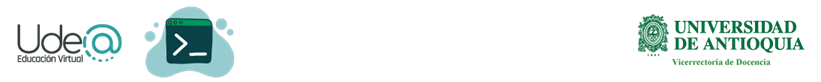

# <h1><center>COVID Regresion Model: a case study in Colombia</center></h1>

**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2023-2**


Utilizaremos la base de datos  de [COL_COVID_dataset](https://ourworldindata.org/coronavirus/country/colombia)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(123)

In [ ]:
!wget 'https://covid.ourworldindata.org/data/owid-covid-data.csv' -O 'COVID_world.csv'

--2023-10-30 00:25:11--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.26.2.153, 104.26.3.153, 172.67.73.95, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.26.2.153|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://covid-19.nyc3.digitaloceanspaces.com/public/owid-covid-data.csv [following]
--2023-10-30 00:25:11--  https://covid-19.nyc3.digitaloceanspaces.com/public/owid-covid-data.csv
Resolving covid-19.nyc3.digitaloceanspaces.com (covid-19.nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to covid-19.nyc3.digitaloceanspaces.com (covid-19.nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92291244 (88M) [binary/octet-stream]
Saving to: ‘COVID_world.csv’

COVID_world.csv     100%[===================>]  88.02M  89.5MB/s    in 1.0s    

2023-10-30 00:25:12 (89.5 

In [ ]:
# Leemos el dataset de COVID con la libreria Pandas
dataCovid = pd.read_csv('COVID_world.csv')

In [ ]:
# visualicemos el dataframe
dataCovid[:10]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
dataCovid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [ ]:
posDataCOL = dataCovid['location'].str.contains('Colombia')
dataCovidCOL = dataCovid[posDataCOL]
dataCovidCOL[:10]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
62652,COL,South America,Colombia,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62653,COL,South America,Colombia,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62654,COL,South America,Colombia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,-84.90000,-1.66,-1.66,-1.666972
62655,COL,South America,Colombia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62656,COL,South America,Colombia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62657,COL,South America,Colombia,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62658,COL,South America,Colombia,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62659,COL,South America,Colombia,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62660,COL,South America,Colombia,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,13.5,65.386,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN
62661,COL,South America,Colombia,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,13.5,65.386,1.71,77.29,0.767,51874028.0,77.99999,0.78,3.33,1.531494


In [ ]:
# Capturemos date, total_cases, new_cases, total_deaths, new_deaths, total_cases_per_million, total_deaths_per_million
fecha = dataCovidCOL['date']
N = np.shape(np.ravel(fecha))
N = N[0]
x = np.linspace(0,N,N)
print(N)

new_cases = dataCovidCOL['new_cases'] # modelar el número de casos para e
new_deaths = dataCovidCOL['new_deaths']
new_deaths_per_million = dataCovidCOL['new_deaths_per_million']
new_cases_per_million = dataCovidCOL['new_cases_per_million']



1392


[0.00000000e+00 1.00071891e+00 2.00143781e+00 3.00215672e+00
 4.00287563e+00 5.00359454e+00 6.00431344e+00 7.00503235e+00
 8.00575126e+00 9.00647017e+00 1.00071891e+01 1.10079080e+01
 1.20086269e+01 1.30093458e+01 1.40100647e+01 1.50107836e+01
 1.60115025e+01 1.70122214e+01 1.80129403e+01 1.90136592e+01
 2.00143781e+01 2.10150971e+01 2.20158160e+01 2.30165349e+01
 2.40172538e+01 2.50179727e+01 2.60186916e+01 2.70194105e+01
 2.80201294e+01 2.90208483e+01 3.00215672e+01 3.10222861e+01
 3.20230050e+01 3.30237239e+01 3.40244428e+01 3.50251618e+01
 3.60258807e+01 3.70265996e+01 3.80273185e+01 3.90280374e+01
 4.00287563e+01 4.10294752e+01 4.20301941e+01 4.30309130e+01
 4.40316319e+01 4.50323508e+01 4.60330697e+01 4.70337886e+01
 4.80345075e+01 4.90352265e+01 5.00359454e+01 5.10366643e+01
 5.20373832e+01 5.30381021e+01 5.40388210e+01 5.50395399e+01
 5.60402588e+01 5.70409777e+01 5.80416966e+01 5.90424155e+01
 6.00431344e+01 6.10438533e+01 6.20445723e+01 6.30452912e+01
 6.40460101e+01 6.504672

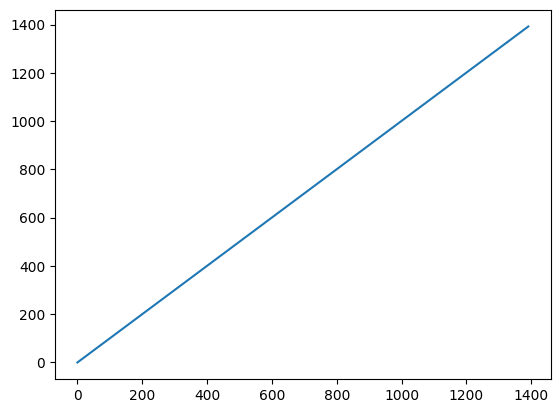

In [ ]:
np.set_printoptions(threshold=np.inf)
print(x)

plt.plot(x)
plt.show()

In [ ]:
print(new_deaths.max())

720.0


Text(0.5, 1.0, 'new_deaths_per_million')

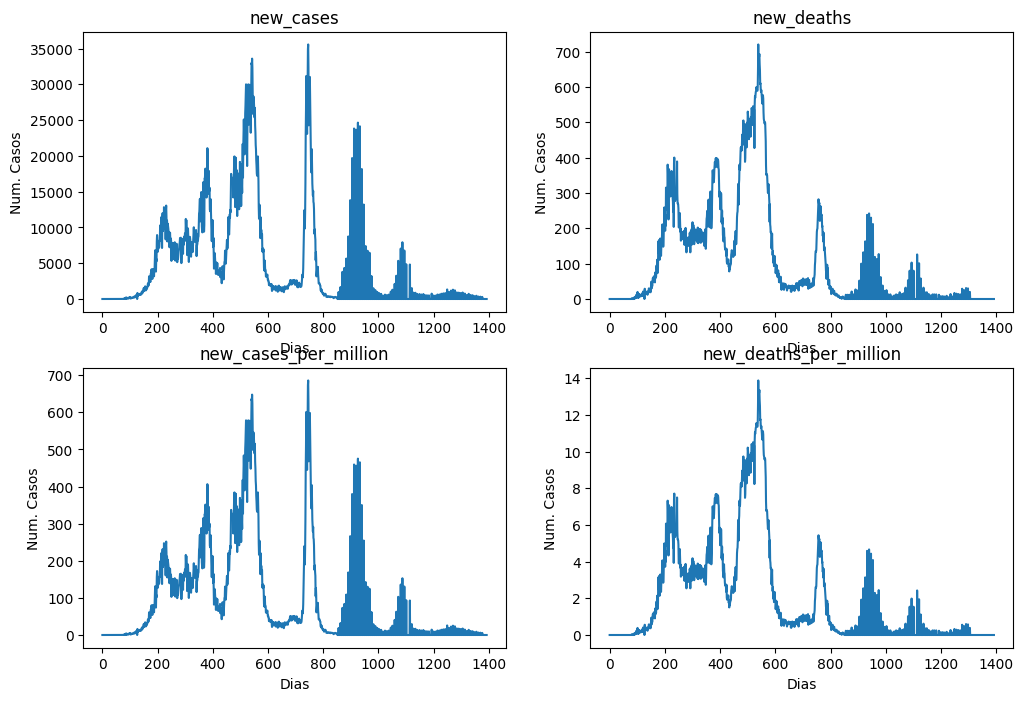

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1),plt.plot(x,new_cases)
plt.xlabel('Dias')
plt.ylabel('Num. Casos')
plt.title('new_cases')
plt.subplot(2,2,2),plt.plot(x,new_deaths)
plt.xlabel('Dias')
plt.ylabel('Num. Casos')
plt.title('new_deaths')
plt.subplot(2,2,3),plt.plot(x,new_cases_per_million)
plt.xlabel('Dias')
plt.ylabel('Num. Casos')
plt.title('new_cases_per_million')
plt.subplot(2,2,4),plt.plot(x,new_deaths_per_million)
plt.xlabel('Dias')
plt.ylabel('Num. Casos')
plt.title('new_deaths_per_million')


In [ ]:
from ipywidgets import interact
%matplotlib inline

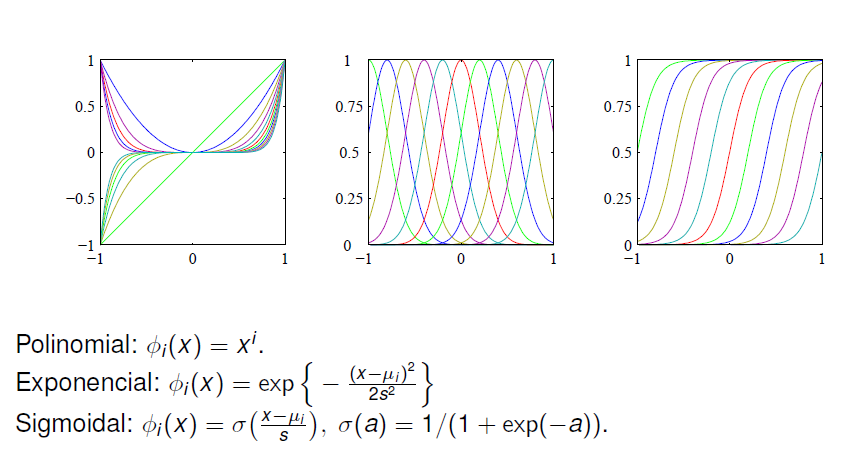

## Tarea

1. Adicionar a las funciones Base la Función Sigmoidal y Exponencial
2. Evaluar el desempeño de regresión para los 2 casos (Máxima Verosimilitud, Máxima Verosimilitud+Regularización)
3. Evaluar el efecto de los parámetros de cada modelo y encontrar el mejor desemepeño en términos del coeficiente de correlación cuadrática $R^2$ y $MAE$

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def experimentoRegresion(N,M,regFlag,lam):
  #N = 10
  x = np.linspace(0.,1.,N)
  t = np.sin(2*np.pi*x)
  t_obs = t + 0.15*np.random.randn(len(t))
  # Vamos construir la propagación de las funciones Base
  #M = 200
  N = len(x)
  matPHI = np.zeros((N,M))
  idxM = np.linspace(0,M,M)
  for n,xn in enumerate(x):
    phi_xn = np.power(xn,idxM)
    matPHI[n,:] = phi_xn

  matPHIT = matPHI.T
  #regFlag = True
  #lam = 0.1
  # Luego de tener la matriz phi podemos calcular el modelo
  if regFlag == False:
    w = np.linalg.inv(matPHIT.dot(matPHI))@(matPHIT@t_obs)
  else:
    w = np.linalg.inv(matPHIT.dot(matPHI) + lam*np.eye(M))@(matPHIT@t_obs)
  # La predicción la puedo obtener mediante
  yEst = matPHI@w

  print("Shape of matPHI: ", matPHI.shape)
  print("Size of matPHI: ", matPHI.size)
  print("Shape of t: ", t_obs.shape)
  print("Size of t: ", t_obs.size)
  print("Shape of w: ", w.shape)
  print("Size of w: ", w.size)

  plt.plot(x,t,'-g',label = 'GT')
  plt.plot(x,t_obs,'ob',label = 'Observations - t')
  plt.plot(x,yEst,'-r',label = 'Predictions - y ')
  plt.legend()
  plt.show()
  #print('w: ', w)
  print('MSE: ', mean_squared_error(t_obs, yEst))
  print('MAE: ', mean_absolute_error(t_obs, yEst))
  print('R2: ', r2_score(t_obs, yEst))

Shape of matPHI:  (10, 5)
Size of matPHI:  50
Shape of t:  (10,)
Size of t:  10
Shape of w:  (5,)
Size of w:  5


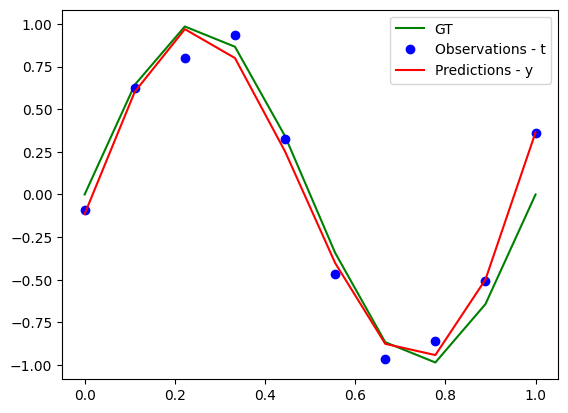

MSE:  0.007068342806693639
MAE:  0.06666345310089246
R2:  0.9834917019355577


In [ ]:
experimentoRegresion(N=10,M=5,regFlag=False,lam=0.1)

In [ ]:
dataCovidCOL['new_cases_per_million'].values

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.90000e-02, 0.00000e+00, 0.00000e+00, 3.90000e-02, 0.000

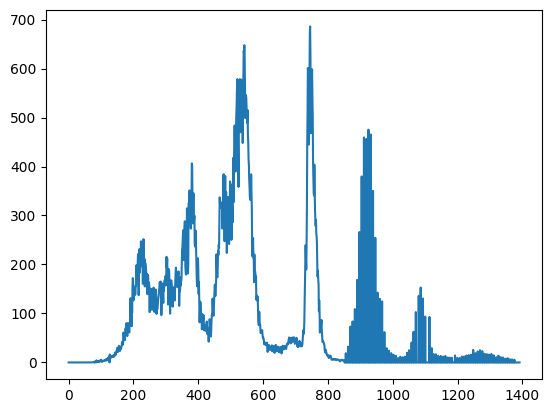

In [ ]:
plt.plot(dataCovidCOL['new_cases_per_million'].values)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Obtener los datos de 'new_cases_per_million'
data = dataCovidCOL['new_cases_per_million'].values.reshape(-1, 1)  # Reshape para que tenga la forma correcta
data = np.nan_to_num(data)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = normalized_data.ravel()
#normalized_data = normalized_data[80:140]

print(np.isnan(normalized_data).any())

False


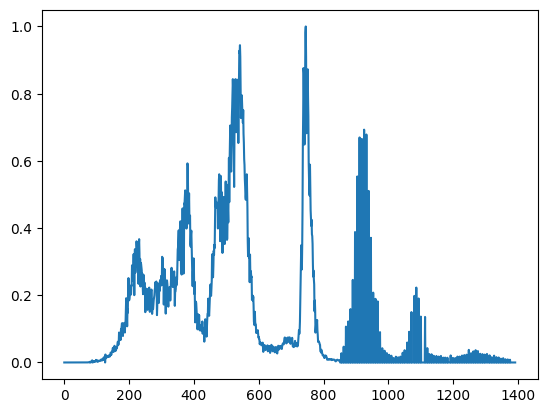

In [ ]:
plt.plot(normalized_data)
plt.show()

In [ ]:
print(normalized_data)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.770503

In [ ]:
#x=x[80:140]
print(x.shape)

(1392,)


In [ ]:
def experimentoRegresion_Polinomial(N,M,regFlag,lam,t):
    # N = cantidad de días
    # x = array de días
    # t = new_cases_per_million
    N = len(x)
    t_obs = t  # t_obs es igual a t
    # Vamos construir la propagación de las funciones Base
    matPHI = np.zeros((N,M))
    idxM = np.linspace(0,M-1,M)

    for n,xn in enumerate(x):
        phi_xn = np.power(xn,idxM)
        #print("n: ", n, "xn: ", xn, "phi_xn: ", phi_xn)
        matPHI[n,:] = phi_xn

    matPHIT = matPHI.T
    if regFlag == False:
        print("Matriz contiene nan?: ", np.isnan(matPHI).any())
        print("Matriz contiene inf?: ", np.isinf(matPHI).any())

        cantidad_de_inf = np.sum(np.isinf(matPHI))
        print("Cantidad de valores Inf en la matriz:", cantidad_de_inf)

        w = np.linalg.inv(matPHIT.dot(matPHI))@(matPHIT@t_obs)
    else:
        w = np.linalg.inv(matPHIT.dot(matPHI) + lam*np.eye(M))@(matPHIT@t_obs)
    # La predicción la puedo obtener mediante
    yEst = matPHI@w

    print("Shape of matPHI: ", matPHI.shape)
    print("Size of matPHI: ", matPHI.size)
    print("Shape of t: ", t_obs.shape)
    print("Size of t: ", t_obs.size)
    print("Shape of w: ", w.shape)
    print("Size of w: ", w.size)
    #print(matPHI[:, :10])
    print(w)

    yEst = np.nan_to_num(yEst)

    plt.figure(figsize=(24, 8))
    plt.plot(x,t,'-g',label = 'GT')
    plt.plot(x,t_obs,'ob',label = 'Observations - t')
    plt.plot(x,yEst,'-r',label = 'Predictions - y ')
    plt.legend()
    plt.show()
    print('MSE: ', mean_squared_error(t_obs, yEst))
    print('MAE: ', mean_absolute_error(t_obs, yEst))
    print('R2: ', r2_score(t_obs, yEst))

Shape of matPHI:  (1392, 20)
Size of matPHI:  27840
Shape of t:  (1392,)
Size of t:  1392
Shape of w:  (20,)
Size of w:  20
[ 3.40287698e-02 -6.65621061e-04 -1.28703323e-05  4.94058064e-07
 -3.61996001e-09  1.07195740e-11 -8.51931455e-15 -2.67481424e-17
  7.21611041e-20 -5.29765877e-23 -3.02494645e-26  7.52227934e-29
 -4.38836536e-32  1.37916167e-36  1.10726068e-38 -5.46508714e-42
 -2.36950633e-45  4.94504520e-48 -2.63740266e-51  4.88269829e-55]


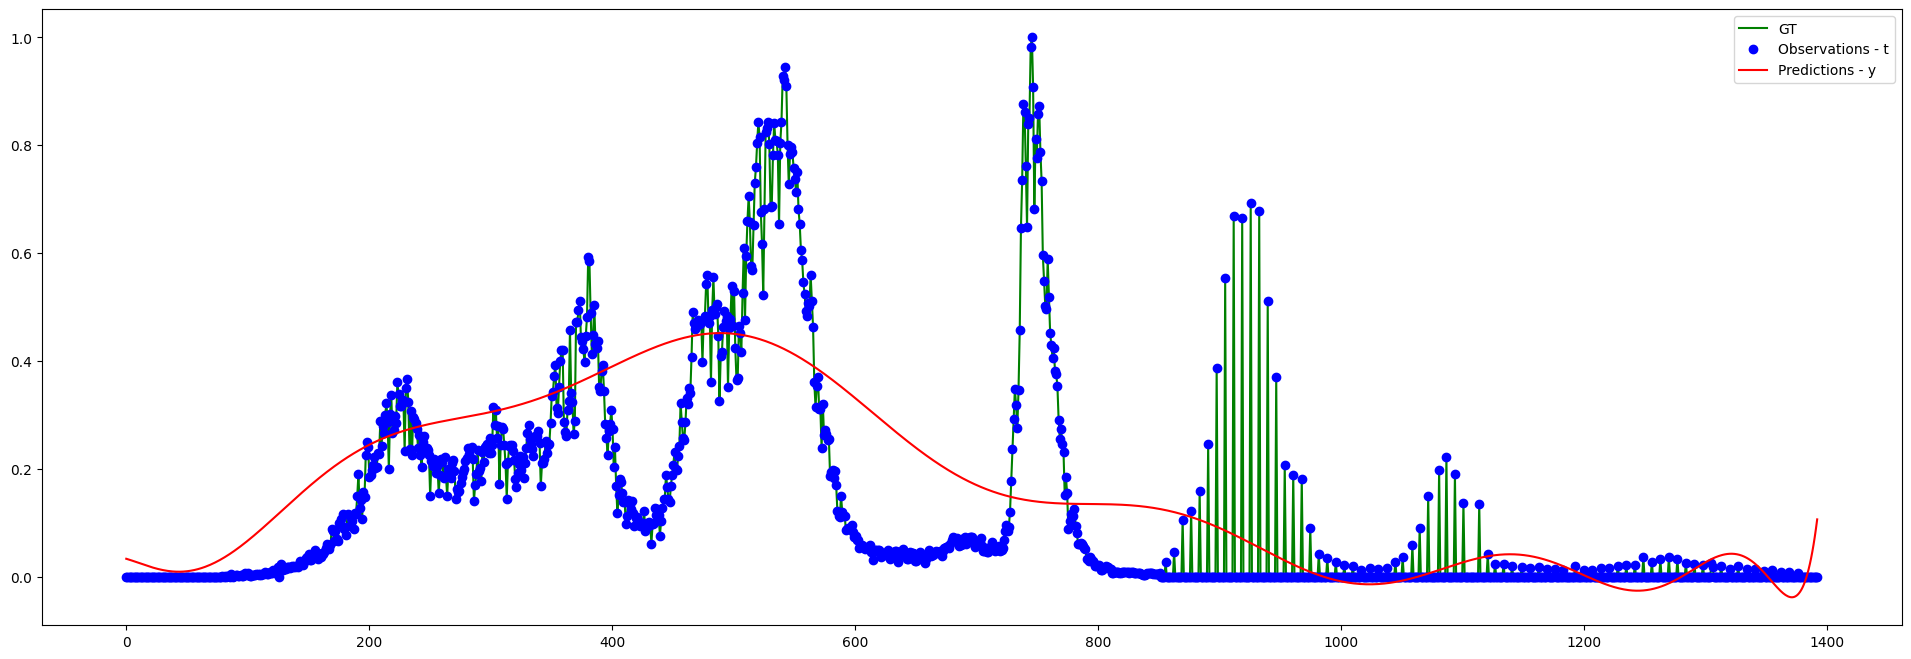

MSE:  0.023504018535042973
MAE:  0.10037891029140346
R2:  0.41572885866109155


In [ ]:
experimentoRegresion_Polinomial(N=500, M=20, regFlag=True, lam=0.1, t=normalized_data)

In [ ]:
def sigmoid(x, alpha=1.0, beta=0.0):
    return 1 / (1 + np.exp(-(alpha * (x - beta))))

def experimentoRegresion_sigmoidal(N,M,regFlag,lam,t):
    # N = cantidad de días
    # x = array de días
    # t = new_cases_per_million
    N = len(x)
    t_obs = t  # t_obs es igual a t
    # Vamos construir la propagación de las funciones Base
    matPHI = np.zeros((N,M))
    idxM = np.linspace(0,M-1,M)
    for n,xn in enumerate(x):
        phi_xn = sigmoid(xn)
        print("n: ", n, "xn: ", xn, "phi_xn: ", phi_xn)
        matPHI[n,:] = phi_xn

    matPHIT = matPHI.T
    if regFlag == False:
        print("Matriz contiene nan?: ", np.isnan(matPHI).any())
        print("Matriz contiene inf?: ", np.isinf(matPHI).any())

        w = np.linalg.inv(matPHIT.dot(matPHI))@(matPHIT@t_obs)
    else:
        w = np.linalg.inv(matPHIT.dot(matPHI) + lam*np.eye(M))@(matPHIT@t_obs)
    # La predicción la puedo obtener mediante
    yEst = matPHI@w

    print("Shape of matPHI: ", matPHI.shape)
    print("Size of matPHI: ", matPHI.size)
    print("Shape of t: ", t_obs.shape)
    print("Size of t: ", t_obs.size)
    print("Shape of w: ", w.shape)
    print("Size of w: ", w.size)
    # print(matPHI[:, :4])
    print(w)
    print(yEst)

    t_obs = np.nan_to_num(t_obs)
    yEst = np.nan_to_num(yEst)

    plt.figure(figsize=(24, 8))
    plt.plot(x,t,'-g',label = 'GT')
    plt.plot(x,t_obs,'ob',label = 'Observations - t')
    plt.plot(x,yEst,'-r',label = 'Predictions - y ')
    plt.legend()
    plt.show()
    print('MSE: ', mean_squared_error(t_obs, yEst))
    print('MAE: ', mean_absolute_error(t_obs, yEst))
    print('R2: ', r2_score(t_obs, yEst))

n:  0 xn:  0.0 phi_xn:  0.5
n:  1 xn:  1.0007189072609632 phi_xn:  0.7311999008953199
n:  2 xn:  2.0014378145219265 phi_xn:  0.8809479566452726
n:  3 xn:  3.0021567217828897 phi_xn:  0.9526714652610624
n:  4 xn:  4.002875629043853 phi_xn:  0.9820645110898486
n:  5 xn:  5.003594536304816 phi_xn:  0.9933310034322956
n:  6 xn:  6.0043134435657795 phi_xn:  0.9975379931922554
n:  7 xn:  7.005032350826743 phi_xn:  0.9990935178726389
n:  8 xn:  8.005751258087706 phi_xn:  0.9996665723778867
n:  9 xn:  9.00647016534867 phi_xn:  0.9998774011324841
n:  10 xn:  10.007189072609632 phi_xn:  0.999954927314877
n:  11 xn:  11.007907979870595 phi_xn:  0.9999834301296325
n:  12 xn:  12.008626887131559 phi_xn:  0.9999939086021986
n:  13 xn:  13.009345794392523 phi_xn:  0.9999977607017752
n:  14 xn:  14.010064701653485 phi_xn:  0.9999991767990719
n:  15 xn:  15.010783608914448 phi_xn:  0.9999996973787798
n:  16 xn:  16.011502516175412 phi_xn:  0.9999998887518592
n:  17 xn:  17.012221423436376 phi_xn:  0.99

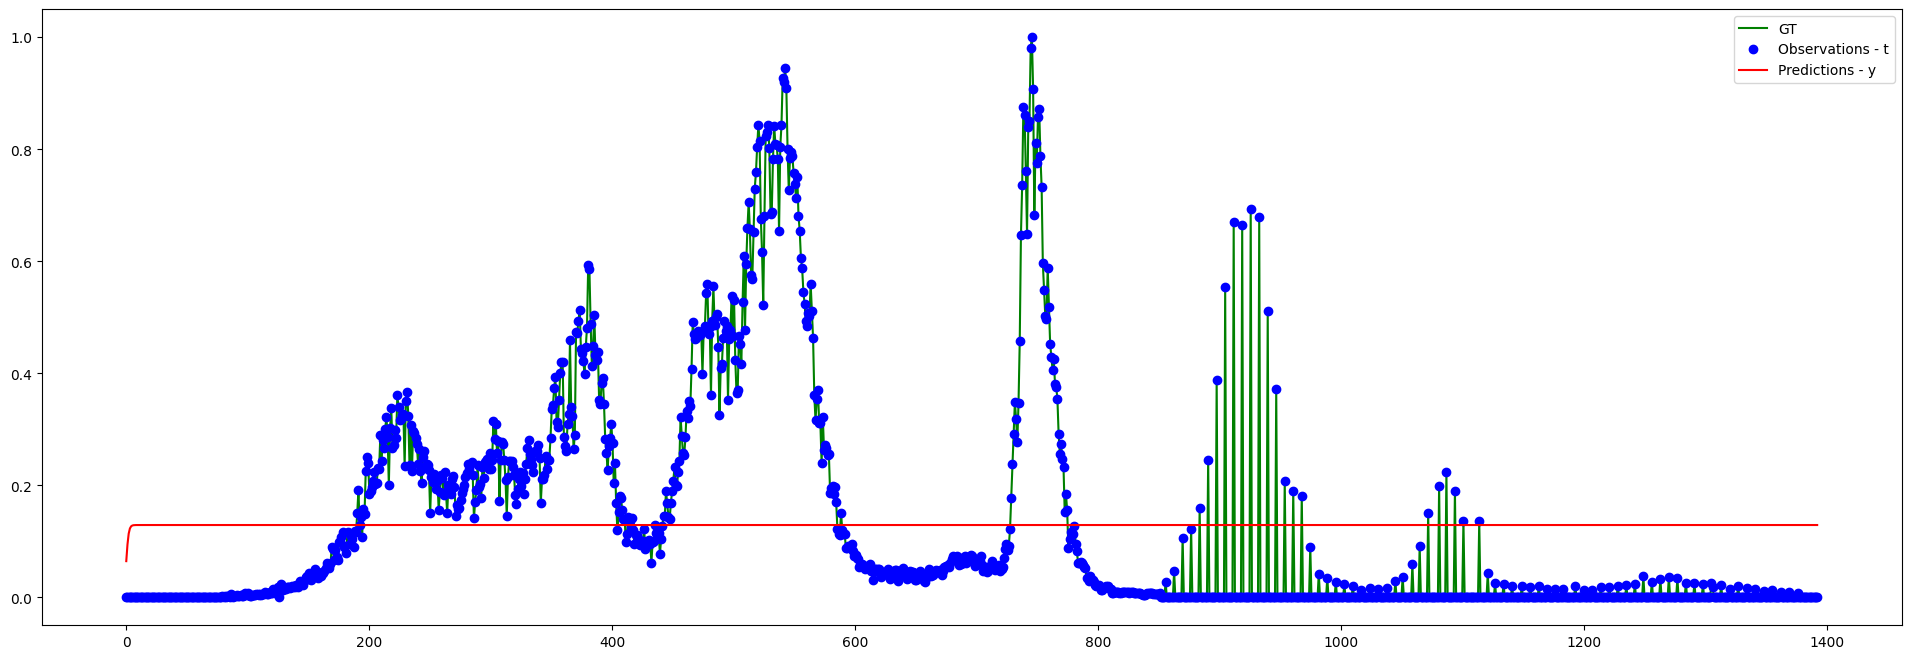

MSE:  0.04020895200571932
MAE:  0.1509704934014224
R2:  0.0004717599504707737


In [ ]:
experimentoRegresion_sigmoidal(N=10, M=10, regFlag=True, lam=1, t=normalized_data)

In [ ]:
def exponencial(x, alpha=1.0):
    return np.exp(alpha * x)

def experimentoRegresion_exponencial(N,M,regFlag,lam,t,x):
    # N = cantidad de días
    # x = array de días
    # t = new_cases_per_million

    N = len(x)
    t_obs = t  # t_obs es igual a t
    # Vamos construir la propagación de las funciones Base
    matPHI = np.zeros((N,M))
    idxM = np.linspace(0,M-1,M)
    for n,xn in enumerate(x):
        phi_xn = exponencial(xn)
        print("n: ", n, "xn: ", xn, "phi_xn: ", phi_xn)
        matPHI[n,:] = phi_xn

    matPHIT = matPHI.T
    if regFlag == False:
        print("Matriz contiene nan?: ", np.isnan(matPHI).any())
        print("Matriz contiene inf?: ", np.isinf(matPHI).any())
        w = np.linalg.inv(matPHIT.dot(matPHI))@(matPHIT@t_obs)
    else:
        w = np.linalg.inv(matPHIT.dot(matPHI) + lam*np.eye(M))@(matPHIT@t_obs)
    # La predicción la puedo obtener mediante
    yEst = matPHI@w

    print("Shape of matPHI: ", matPHI.shape)
    print("Size of matPHI: ", matPHI.size)
    print("Shape of t: ", t_obs.shape)
    print("Size of t: ", t_obs.size)
    print("Shape of w: ", w.shape)
    print("Size of w: ", w.size)
    # print(matPHI[:, :4])
    print(w)

    t_obs = np.nan_to_num(t_obs)
    yEst = np.nan_to_num(yEst)

    plt.figure(figsize=(24, 8))
    plt.plot(x,t,'-g',label = 'GT')
    plt.plot(x,t_obs,'ob',label = 'Observations - t')
    plt.plot(x,yEst,'-r',label = 'Predictions - y ')
    plt.legend()
    plt.show()
    print('MSE: ', mean_squared_error(t_obs, yEst))
    print('MAE: ', mean_absolute_error(t_obs, yEst))
    print('R2: ', r2_score(t_obs, yEst))

n:  0 xn:  0.0 phi_xn:  1.0
n:  1 xn:  1.0007189072609632 phi_xn:  2.720236723612834
n:  2 xn:  2.0014378145219265 phi_xn:  7.399687832491884
n:  3 xn:  3.0021567217828897 phi_xn:  20.128902585215478
n:  4 xn:  4.002875629043853 phi_xn:  54.755380018328445
n:  5 xn:  5.003594536304816 phi_xn:  148.9475955412334
n:  6 xn:  6.0043134435657795 phi_xn:  405.1727192850943
n:  7 xn:  7.005032350826743 phi_xn:  1102.1657104053872
n:  8 xn:  8.005751258087706 phi_xn:  2998.151640951562
n:  9 xn:  9.00647016534867 phi_xn:  8155.6821966765265
n:  10 xn:  10.007189072609632 phi_xn:  22185.386217514853
n:  11 xn:  11.007907979870595 phi_xn:  60349.50231641787
n:  12 xn:  12.008626887131559 phi_xn:  164164.9324528778
n:  13 xn:  13.009345794392523 phi_xn:  446567.4779877389
n:  14 xn:  14.010064701653485 phi_xn:  1214769.2531934122
n:  15 xn:  15.010783608914448 phi_xn:  3304459.9332524533
n:  16 xn:  16.011502516175412 phi_xn:  8988913.262140546
n:  17 xn:  17.012221423436376 phi_xn:  24451971.961

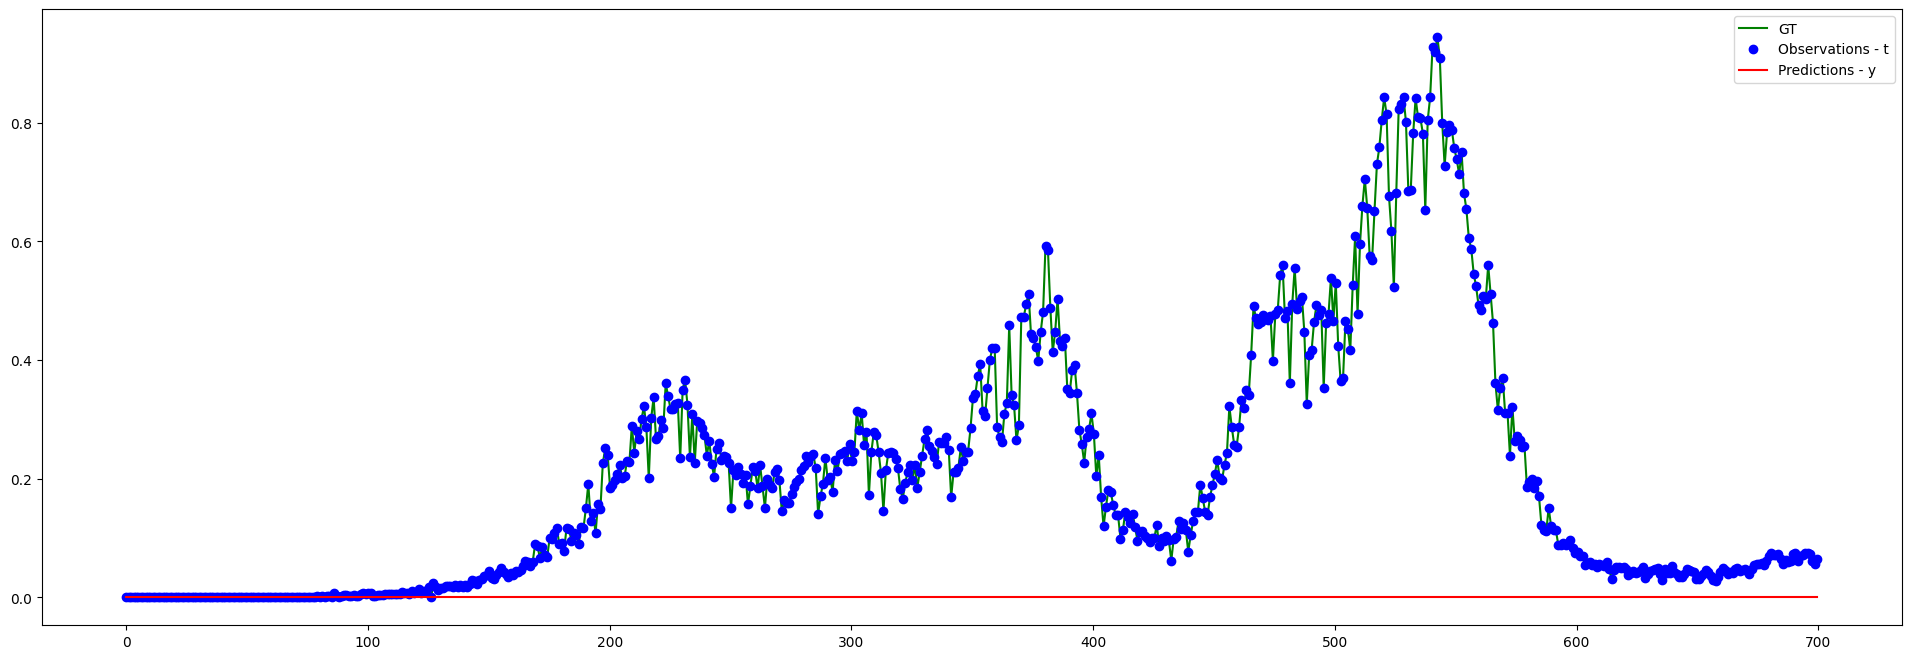

MSE:  0.08502465156753328
MAE:  0.20358336464904597
R2:  -0.9510703547310522


In [ ]:
experimentoRegresion_exponencial(N=10, M=5, regFlag=False, lam=0.1, t=normalized_data[:700], x=x[:700])